
Домашняя работа к лекции 4 по курсу Временные ряды.
---------
**Марковские случайные процессы, построение марковских моделей для временных рядов, прогнозирование значений**

Студента: **Помойницкого Евгения**

Группа: **DS 8**

Задание
---
Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов

[Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [481]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [482]:
with open('tom_1.txt', 'r', encoding='koi8-r') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

Посмотрим, на примере части текста, что прочиталось

In [483]:
text[:500]

'ппппппяяппппппппппяппппппппппппппппппппппппппппппппппппппппппппппппппппяпппяяпппппппппппппппппппппппппбпппппяяяябпппппяпяпяпппяяяпппяпяпппяпппяпппяяппппппппяяппппппппяяяяппяппппппппппппяяпппяяппяпяппяпяппппяпяпппяпппппяппппяпяяпяппяппппппяпппяпяппппппппяпяпппппяпяпяяпяпппппяяппяпяппяяяяпппппяпяяпяяппяпппяппяяяяпппппяпяяпяябяппяпппяяппппппяпяяппппяяпппппяяппппппппяпяпяппппппяппппяпяппяппяппяяпяпяпппяппяяпяпяпппппяяяпяппяпяппяяпппяпяяпяпяяпппяпппяппппппппяпппппяппппппппппяяппяппппппппппппппяпяяяпп'

Очевидно, кодировка не та. Берем другую распространенную.

In [484]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()
text = re.sub('[^а-я]','', text)

In [485]:
text[:500]

'левтолстойвойнаимиртомтомчастьперваячастьораячастьтретьятомлевниколаевичтолстойвойнаимиртомчастьперваяепоместьямойверныйрабнучтокнязьгенуаилуккасталинебольшекакпоместьямифамилиибонапартенетяваспредупреждаюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритенуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлин'

In [486]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {i:j for j,i in enumerate(RUSSIAN) }

In [487]:
POS

{'а': 0,
 'б': 1,
 'в': 2,
 'г': 3,
 'д': 4,
 'е': 5,
 'ё': 6,
 'ж': 7,
 'з': 8,
 'и': 9,
 'й': 10,
 'к': 11,
 'л': 12,
 'м': 13,
 'н': 14,
 'о': 15,
 'п': 16,
 'р': 17,
 'с': 18,
 'т': 19,
 'у': 20,
 'ф': 21,
 'х': 22,
 'ц': 23,
 'ч': 24,
 'ш': 25,
 'щ': 26,
 'ъ': 27,
 'ы': 28,
 'ь': 29,
 'э': 30,
 'ю': 31,
 'я': 32}

In [488]:
prob = np.zeros((len(RUSSIAN), len(RUSSIAN)))
prob.shape

(33, 33)

In [489]:
for i, j in zip(text[:-1], text[1:]):
    prob[POS[i], POS[j]] += 1

По аналогии с материалами лекции, произведем нормировку

In [490]:
prob = prob / prob.sum(axis=1)[:,None]
prob

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[4.60360320e-03, 1.88791997e-02, 6.93860387e-02, ...,
        4.13881634e-03, 1.10663539e-02, 4.18750830e-02],
       [7.92302731e-02, 2.04257149e-03, 3.44012040e-03, ...,
        1.93506773e-03, 4.30015051e-04, 3.23586326e-02],
       [1.51792556e-01, 5.40387950e-03, 1.00818647e-02, ...,
        7.37992499e-03, 1.20982377e-04, 3.75045368e-03],
       ...,
       [0.00000000e+00, 6.14250614e-04, 2.45700246e-03, ...,
        6.14250614e-04, 0.00000000e+00, 0.00000000e+00],
       [2.23239840e-02, 7.55580996e-02, 5.29479107e-02, ...,
        6.86891815e-03, 7.15512307e-03, 8.01373784e-03],
       [1.41917896e-02, 2.38133419e-02, 7.20814625e-02, ...,
        6.81526620e-03, 4.81077614e-03, 1.43521488e-02]])

In [491]:
df = pd.DataFrame(prob, index=(l for l in RUSSIAN), columns=(l for l in RUSSIAN))

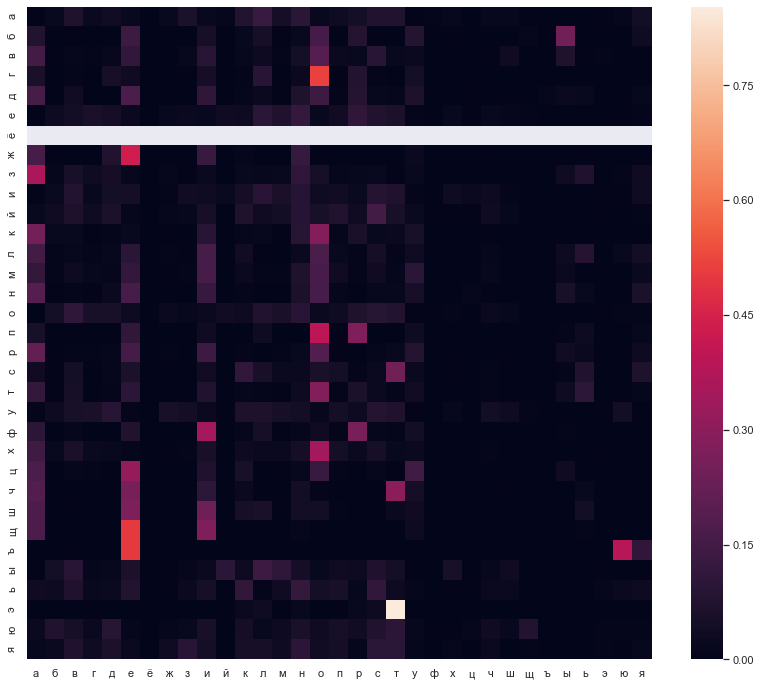

In [492]:
plt.figure(figsize=(14,12))
sns.heatmap(df)
plt.show()

Видим, что буква ё в данном тексте не использовалась, использовался алфавит в 32 буквы. Соответственно, для дальнейших вычислений начальную вероятность любой буквы будем оценивать в $1/32$

Также, надо переопределить набор букв и словарь с нумерацией

In [493]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {i:j for j,i in enumerate(RUSSIAN) }
prob = prob / prob.sum(axis=1)[:,None]

Посчитаем вероятность найти строку вида "п--р". По теореме о состояних марковской цепи, для этого надо просуммировать все вероятности вариантов траекторий требуемого вида.

In [494]:
a = POS['п']
b = POS['р']
probab_root = 0
probabilities = {}
for l in RUSSIAN:
    for m in RUSSIAN:
        proba = (1/32) * prob[a, POS[l]] * prob[POS[l], POS[m]] * prob[POS[m], b]
        if proba > 0.:
            probab_root += proba
            probabilities[''.join(['п', l, m, 'р'])] = proba

print(f'Вероятность строки вида "п--р" составляет {probab_root}')

Вероятность строки вида "п--р" составляет 0.0008528020327774517


In [495]:
# Можно вывести все ненулевые варианты траекторий

probabilities

{'паар': 9.419773252018029e-09,
 'пабр': 3.8528872477600526e-10,
 'павр': 1.012807202360051e-07,
 'пагр': 6.154656227691495e-09,
 'падр': 1.9261987166865457e-08,
 'паер': 4.523818365463586e-08,
 'пазр': 1.6962428178607425e-09,
 'паир': 4.2049183851468525e-08,
 'пайр': 4.573840472758652e-08,
 'пакр': 5.034502745998391e-08,
 'палр': 5.3956107846107975e-08,
 'памр': 1.4978728458294633e-07,
 'панр': 1.0763208595243079e-07,
 'паор': 6.22246947556907e-08,
 'папр': 3.460429457457752e-08,
 'парр': 7.540636950169604e-09,
 'паср': 1.502940921787375e-08,
 'патр': 2.1609657332518298e-07,
 'паур': 4.6424960297824825e-08,
 'пафр': 1.9171287488152286e-08,
 'пахр': 5.3512779815681176e-09,
 'пацр': 4.424637817591709e-08,
 'пачр': 1.147290346427617e-09,
 'пашр': 9.33241486351509e-10,
 'пащр': 8.322235957924576e-09,
 'паюр': 9.652299864346631e-10,
 'паяр': 3.507337038376401e-08,
 'пбар': 3.5509274418768613e-06,
 'пббр': 9.130363458812187e-10,
 'пбвр': 1.0998574749219197e-07,
 'пбгр': 8.485379217642814e-0

Сгенерируем слово из 8 букв, начинающееся с "б", на основе матрицы переходных вероятностей. В качестве принципа выбора следующей буквы возьмем, например, максимальную вероятность по строке, то есть, наиболее вероятную следующую букву

In [496]:
letter = 'б'
word = letter
dic ={}
while len(word) < 8:
    max_prob_letter_index = np.argmax(prob[POS[letter],:])
    next_letter = list(POS.keys())[max_prob_letter_index] 
    word += next_letter
    letter = next_letter
    dic[next_letter] = prob[POS[letter],:].max()

word

'бьмпвпвп'

Посмотрим численные значение вероятностей последующих букв, вошедших в сгенерированное слово

In [497]:
dic

{'ь': 0.1390002934559327,
 'м': 0.16869016615926347,
 'п': 0.10585103777128207,
 'в': 0.1903859337823124}

Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

Ссылка в задании не работает, истек сертификат сайта, теперь datamarket.com выводит на qlik.com

Возьмем для анализа ряд из ДЗ 1, в том числе используем его приведение к стационарному виду

In [498]:
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM
from scipy.stats import boxcox

In [499]:
series = pd.read_csv('../Series/monthly-boston-armed-robberies-j.csv')
series = series['Count']

In [500]:
series = boxcox(series, 0)
series = np.diff(series)

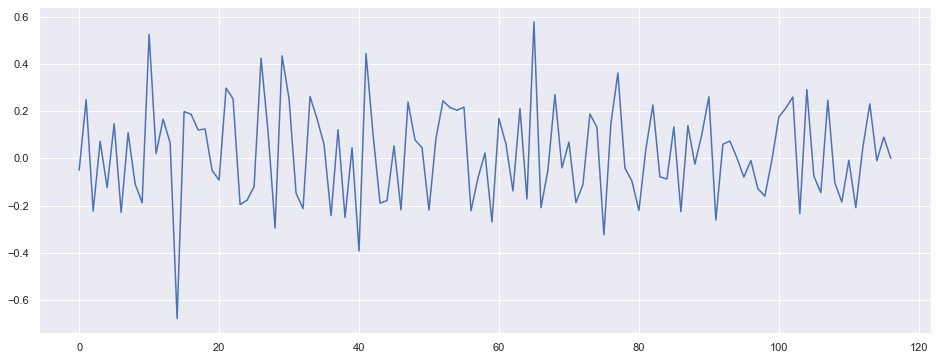

In [501]:
plt.style.context('bmh')
plt.figure(figsize=(16,6))
plt.plot(series)
plt.show()

In [502]:
series = pd.DataFrame(series)
values = series.values.reshape(-1,1)

In [503]:
scores = []

for n in range(1,10):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    scores.append(model.score(values))
    print ('Для кол-ва компонент {} правдододобие равно {}'.format (n, model.score(values)))

Для кол-ва компонент 1 правдододобие равно 18.727124472456573
Для кол-ва компонент 2 правдододобие равно 21.192584149139016
Для кол-ва компонент 3 правдододобие равно 25.16316307482625
Для кол-ва компонент 4 правдододобие равно 31.502681580881763
Для кол-ва компонент 5 правдододобие равно 38.65337410433485
Для кол-ва компонент 6 правдододобие равно 43.37764409376066
Для кол-ва компонент 7 правдододобие равно 54.19694599977803
Для кол-ва компонент 8 правдододобие равно 61.05296042130471
Для кол-ва компонент 9 правдододобие равно 66.16629268339312


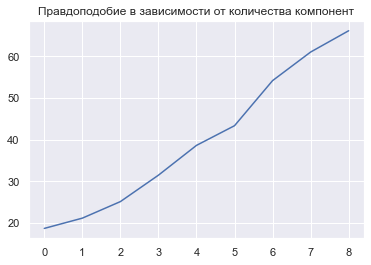

In [504]:
plt.plot(scores)
plt.title('Правдоподобие в зависимости от количества компонент')
plt.show()

Если брать больше компонент, модель начинает ругаться, что ряд коротковат. Оценим визуально качество модели при максимальном количестве компонент и при меньших значениях

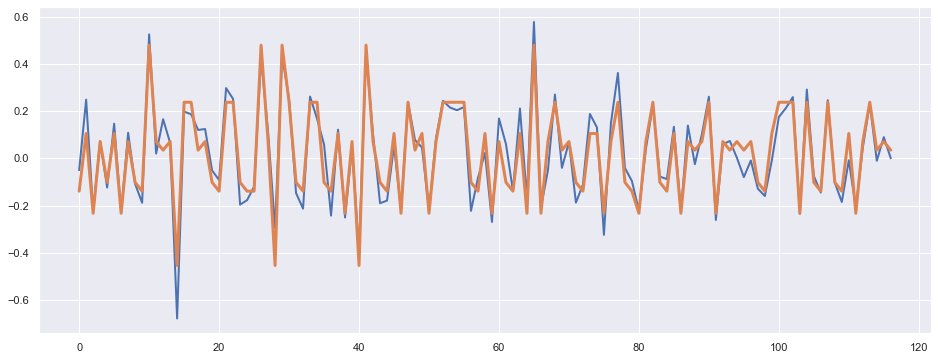

In [505]:
model = GaussianHMM(n_components=9,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.style.context('bmh')
plt.figure(figsize=(16,6))
plt.plot(values, linewidth=2)
plt.plot(means, linewidth=3)
plt.show()

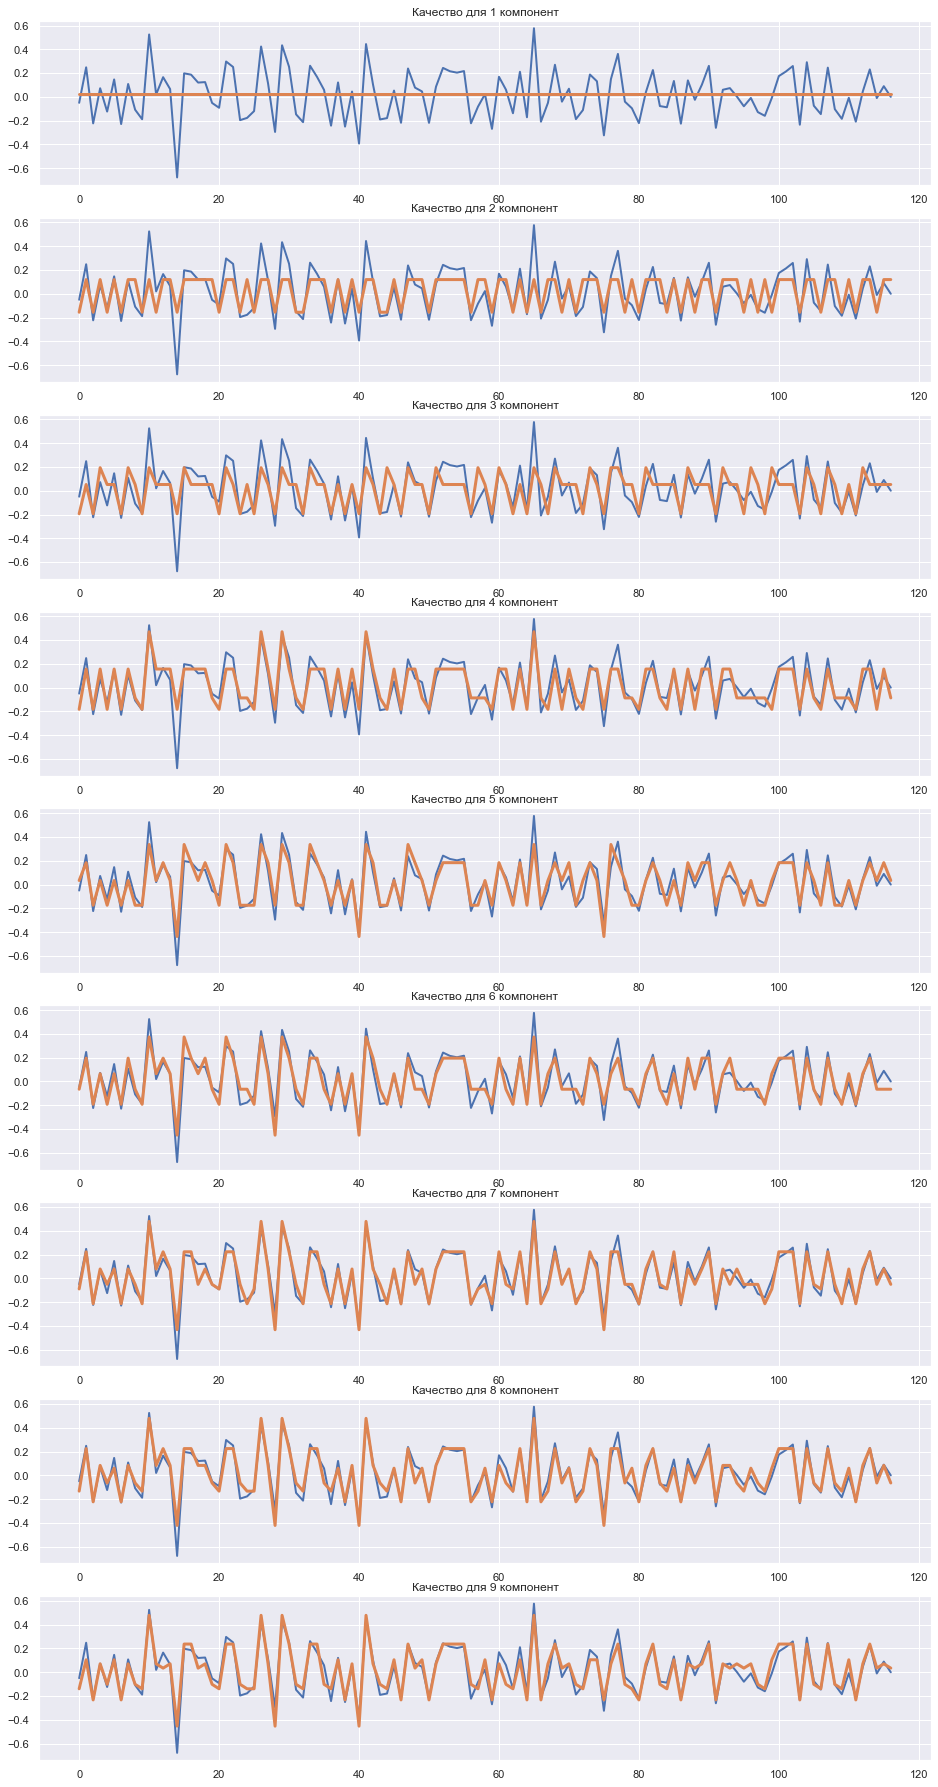

In [506]:
f, axs = plt.subplots(nrows=9, ncols=1, figsize=(16,32))

for i in range(9):
    model = GaussianHMM(n_components=i+1,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    labels = model.predict(values)
    means = np.zeros_like(values)
    
    for j in range(model.n_components):
        means[labels == j] = model.means_[j]
        
    axs[i].plot(values, linewidth=2)
    axs[i].plot(means, linewidth=3)
    axs[i].set_title('Качество для {} компонент'.format(i+1))
    

Спрогнозируем 10 значений на основе модели. Сначала переопределим модель

In [517]:
model = GaussianHMM(n_components=9,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=9, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

Определим в переменную Р матрицу вероятностей компонент.

In [523]:
P = model.transmat_
components = model.n_components
labels = model.predict(values)
labels[-1]

6

Можно посмотреть, как меняются скрытые компоненты по вероятностям из матрицы

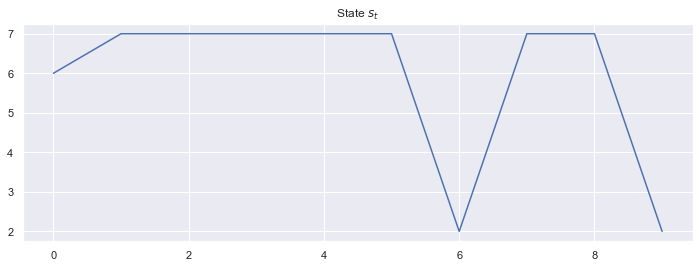

[6, 7, 7, 7, 7, 7, 2, 7, 7, 2]


In [520]:
s = [labels[-1]]
for t in range(9):
    distribution = P[s[0]]
    s.append(np.random.choice(components, p=distribution))
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
_ = axs.plot(s)
_ = axs.set_title('State $s_t$')
plt.show()
print(s)

В качестве значений предсказания берем средние по каждой из компонент.

In [521]:
prediction = []
for i in s:
    prediction.append(model.means_[i])
    
prediction = np.array(prediction)

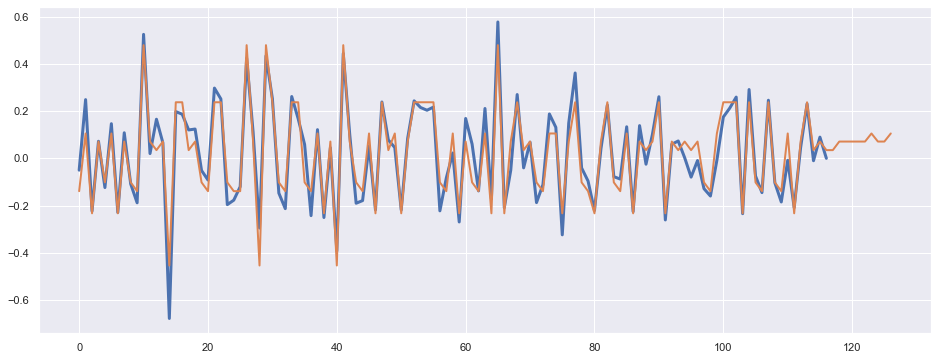

In [522]:
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

a=means.reshape(1,117)[0]
b=prediction.reshape(1,10)[0]
z = np.hstack((a,b))

plt.style.context('bmh')
plt.figure(figsize=(16,6))
plt.plot(values, linewidth=3)
plt.plot(z, linewidth=2)
plt.show()